# Introducción al Análisis Exploratorio de Datos
***Exploratory Data Analysis (EDA)***


Ejemplo basado en *la historia de la vida* 😊


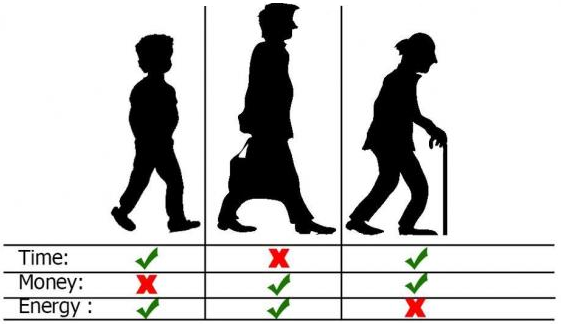


## Preprocesamiento de datos

Importación de módulos y librerías útiles

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Archivos pueden arrastrarse al área de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_IA/raw/main/1_RNA_Classification/data_classification.zip

--2023-08-18 21:29:39--  https://github.com/AxelSkrauba/Taller_IA/raw/main/1_RNA_Classification/data_classification.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/1_RNA_Classification/data_classification.zip [following]
--2023-08-18 21:29:39--  https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/1_RNA_Classification/data_classification.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004 (2.0K) [application/zip]
Saving to: ‘data_classification.zip’

data_classification 100%[===================>]   1.96K  --.-KB/s    in 0s      

2023-08-18 21:29:39 (5

In [ ]:
!unzip data_classification.zip

Archive:  data_classification.zip
  inflating: data_test.csv           
  inflating: data.csv                


In [ ]:
# Lectura del dataset
dataset = pd.read_csv("data.csv")

In [ ]:
# Para visualizar un fragmento de los datos
dataset.head(5)

,tiempo,dinero,energia,clase
0,0.94,0.44,0.17,Anciano
1,0.81,0.02,0.84,Joven
2,0.89,0.06,0.94,Joven
3,0.84,0.09,0.31,Adulto
4,0.95,0.76,0.19,Anciano


In [ ]:
# Para visualizar tipos de datos, cantidades, etc.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tiempo   200 non-null    float64
 1   dinero   200 non-null    float64
 2   energia  200 non-null    float64
 3   clase    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
dataset.describe()
# Genera los descriptores estadísticos básicos

,tiempo,dinero,energia
count,200.000000,200.000000,200.000000
mean,0.854100,0.343750,0.500650
std,0.136121,0.304445,0.320212
min,0.500000,0.000000,0.000000
25%,0.800000,0.060000,0.210000
50%,0.910000,0.280000,0.465000
75%,0.950000,0.570000,0.812500
max,1.000000,0.970000,1.000000


In [ ]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col,"->", dataset[col].unique())

clase -> ['Anciano' 'Joven' 'Adulto']


<Axes: ylabel='clase'>

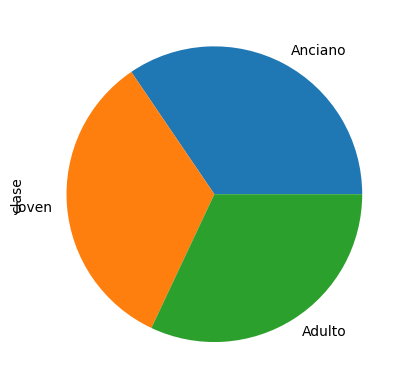

In [ ]:
# Ejemplo de gráfica para una idea de las distribuciones
# En este caso... todo está medianamente equilibrado
# En la vida real es diferente
dataset['clase'].value_counts().plot.pie()

<ipython-input-10-6533168483e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


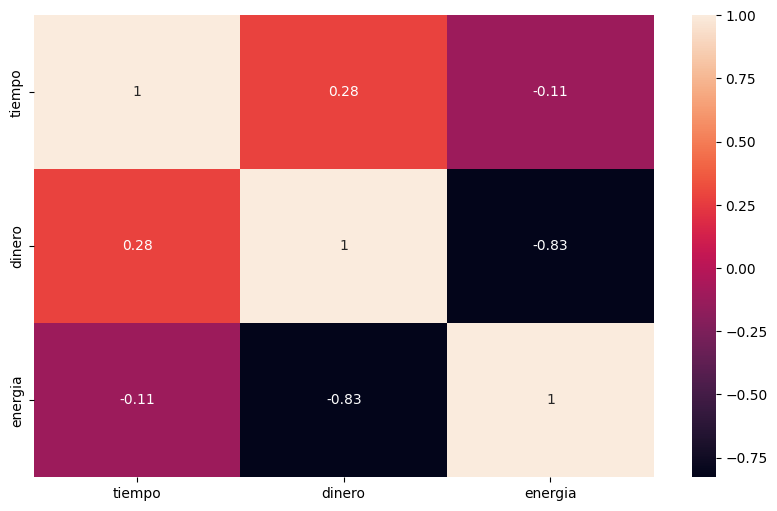

In [ ]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
# Antes de plantear cualquier modelo, existe un gran trabajo de procesamiento y análisis de los datos. Herramientas Estadísticas juegan un roll fundamental.
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# En este caso, por ejemplo, no se observan fuertes relaciones entre las variables. Por lo tanto, en principio existe información útil en todas.
# NOTA: variables aletorias tampoco estarán correlacionadas, pero en este punto, asumimos que anteriormente validamos que estas variables "tienen que ver" con nuestro problema.

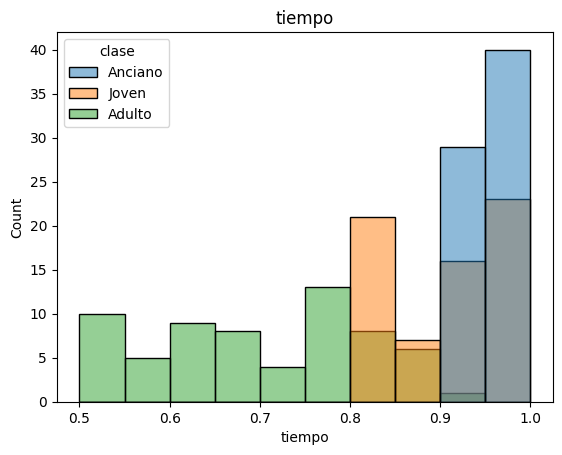

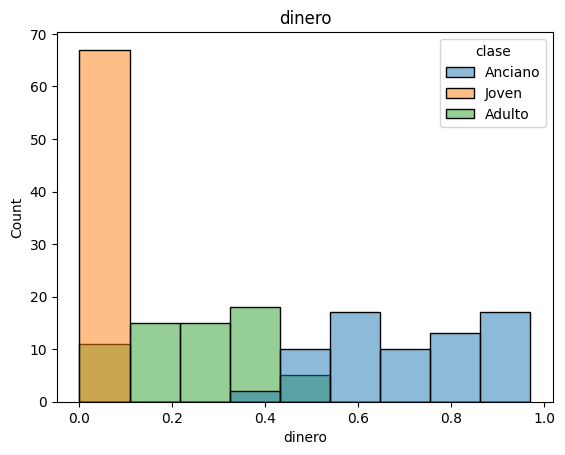

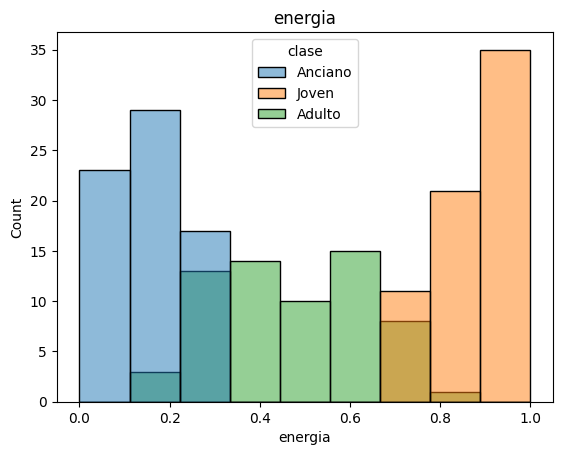

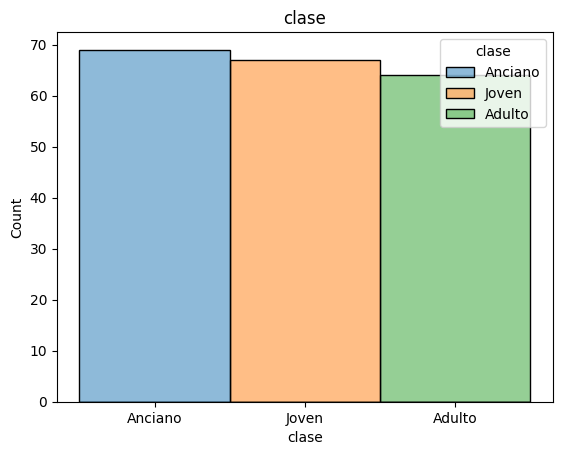

In [ ]:
# Más ejemplos de gráficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='clase')
    plt.show()

# Se aprecia por ejemplo, que existen superposiciones en los rangos de las variables. Por lo tanto, no sería tan sencillo clasificar las clases de salida
# y obtener una precisión buena con simples secuencias de selección (IF anidados por ejemplo, en dónde se establece un umbral estricto).

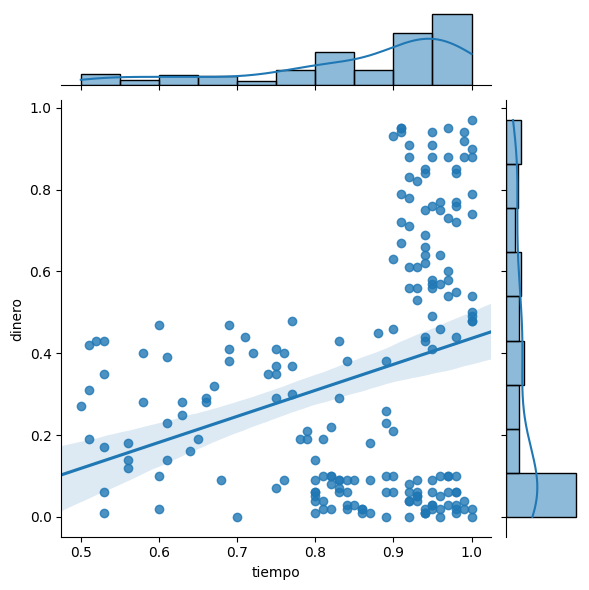

In [ ]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="tiempo", y="dinero", data=dataset,
                  kind="reg", truncate=False)

**Seaborn** es ideal para estudios estadísticos. Va un ejemplo más.

El uso de *PairGrid* puede brindar un resumen muy rápido y de muy alto nivel de las relaciones interesantes del conjunto de datos.

Una forma muy común de usar esta gráfica es coloreando las observaciones por una variable categórica separada.

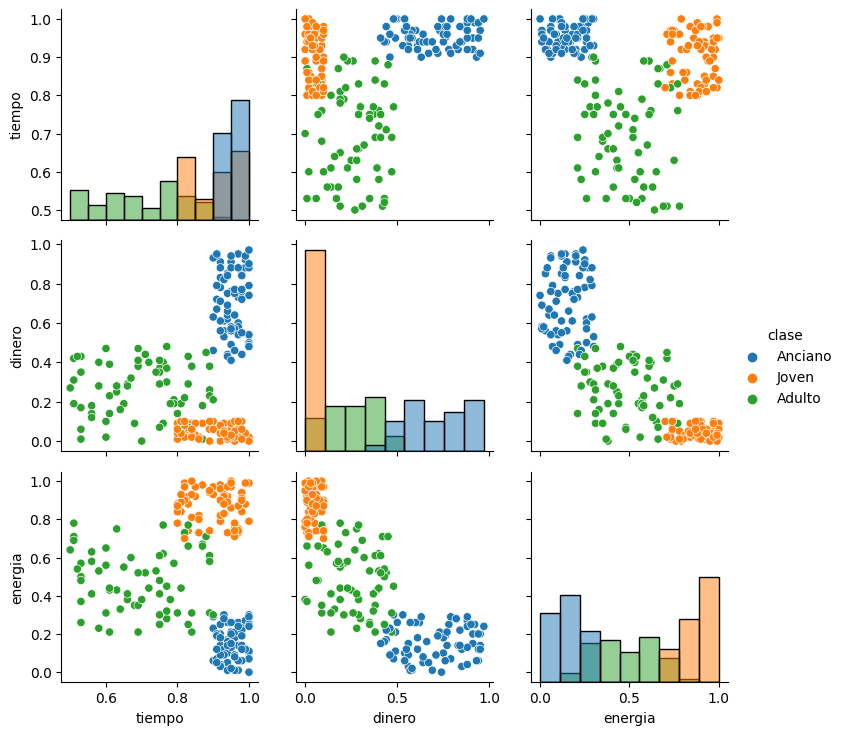

In [ ]:
g = sns.PairGrid(dataset, hue="clase")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset.pop('clase')
print("Y antes:\n", y[:5])

# Preprocesamiento
# Se codifica numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “Joven” y “Adulto” en la clase, queda 0 y 1.
le = LabelEncoder()

y = le.fit_transform(y)     # Con le.inverse_transform() recuperamos luego la etiqueta original
print("Y despues: ", y[:5])

Y antes:
 0    Anciano
1      Joven
2      Joven
3     Adulto
4    Anciano
Name: clase, dtype: object
Y despues:  [1 2 2 0 1]


In [ ]:
y.shape

(200,)

In [ ]:
# Cantidad de datos a procesar.
print("Tamaño actual - Salida:", y.shape)

Tamaño actual - Salida: (200,)


In [ ]:
X = np.asarray(dataset) # Esto se puede hacer directamente porque para "y" se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", X.shape) # Es importante que el tamaño sea consistente entre X e Y (Entrada y Salida).

Tamaño actual - Entrada: (200, 3)


In [ ]:
# Ver datos de una determinada fila
index = 0
print("Tiempo: {} - Dinero: {} - Energía: {} || Clase: {}".format(X[index][0], X[index][1], X[index][2], le.inverse_transform(y)[index]))

Tiempo: 0.94 - Dinero: 0.44 - Energía: 0.17 || Clase: Anciano


In [ ]:
# División del dataset
# test_size: indica el porcentaje destinado a test/validacion
# random_state: un valor aleatorio cualquiera, sirve para garantizar repetibilidad. En este caso, en referencia a la subdivisión del set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
X_train.shape

(180, 3)

In [ ]:
X_test.shape

(20, 3)

In [ ]:
X_train[0]

array([1.  , 0.5 , 0.26])

In [ ]:
y_train[0]

1

# Referencias y Recursos

*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://matplotlib.org/stable/plot_types/index.html